# Análise de dados com Python: substituindo planilhas por código
----
por Rodrigo Amaral

## Carregando uma planilha

Antes de começar, precisamos importar a biblioteca `pandas`:

In [1]:
import pandas as pd

O método `read_excel()` lê uma planilha a partir de um arquivo do Excel e carrega seu conteúdo em uma estrutura do Pandas chamada `DataFrame`:

In [2]:
df  = pd.read_excel("data/funcionarios.xlsx")

Para mostrar apenas as primeiras linhas de um DataFrame, usamos o método `head()`:

In [3]:
df.head()

,Matrícula,Nome,E-mail,Gênero,Data de Nascimento,Escolaridade
0,1,Rhodie Rudgley,rrudgley0@yale.edu,Feminino,28/08/1981,Mestrado
1,2,Laverna Rochell,lrochell1@cargocollective.com,Feminino,18/03/1996,Mestrado
2,3,Mead Choules,mchoules2@bloomberg.com,Masculino,23/11/1987,Médio
3,4,Averil Brownett,abrownett3@who.int,Masculino,23/07/1991,Especialização
4,5,Giacinta Lammin,glammin4@moonfruit.com,Feminino,13/08/1954,Doutorado


Para mostrar as últimas linhas, usamos `tail()`:

In [4]:
df.tail()

,Matrícula,Nome,E-mail,Gênero,Data de Nascimento,Escolaridade
995,996,Giorgio Teall,gteallrn@sphinn.com,Masculino,12/05/1950,Mestrado
996,997,Eldridge Peacocke,epeacockero@biglobe.ne.jp,Masculino,11/07/1965,Especialização
997,998,Brig Antcliffe,bantclifferp@addtoany.com,Masculino,07/11/1961,Superior
998,999,Lion Plant,lplantrq@odnoklassniki.ru,Masculino,28/09/1998,Mestrado
999,1000,Davine Scala,dscalarr@ovh.net,Feminino,22/05/2000,Doutorado


A propriedade `shape` mostra as dimensões do dataframe (número de linhas e colunas, neste caso):

In [5]:
df.shape

(1000, 6)

O método `info()` imprime um resumo das informações sobre o DataFrame, incluindo os tipos de dados de cada coluna, a quantidade de valores nulos e o consumo de memória.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
Matrícula             1000 non-null int64
Nome                  1000 non-null object
E-mail                1000 non-null object
Gênero                1000 non-null object
Data de Nascimento    1000 non-null object
Escolaridade          1000 non-null object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


## Convertendo tipos de dados

Data de Nascimento é uma string que precisa ser convertida para o tipo `datetime` para que possamos efetuar cálculos com essa data.

In [7]:
df["Data de Nascimento"] = pd.to_datetime(df["Data de Nascimento"], format="%d/%m/%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
Matrícula             1000 non-null int64
Nome                  1000 non-null object
E-mail                1000 non-null object
Gênero                1000 non-null object
Data de Nascimento    1000 non-null datetime64[ns]
Escolaridade          1000 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 47.0+ KB


## Inserindo coluna com as idades atuais dos funcionários

Primeiro criamos uma função para obter o cálculo da idade em anos:

In [8]:
# antes precisamos importar o numpy para usar a função timedelta64
import numpy as np
def calcular_idade(data_nasc):
    return (pd.Timestamp('now') - data_nasc) / np.timedelta64(1, "Y")

Em seguida, aplicamos a função `calcular_idade()` à coluna "Data de Nascimento" usando o método `apply()` do dataframe. Usamos o método `astype()` para como uma forma de arredondar as idades para valores inteiros. Então, atribuímos a série resultante à nova coluna "Idade".

In [9]:
df["Idade"] = df["Data de Nascimento"].apply(calcular_idade).astype("int")
df.head()

,Matrícula,Nome,E-mail,Gênero,Data de Nascimento,Escolaridade,Idade
0,1,Rhodie Rudgley,rrudgley0@yale.edu,Feminino,1981-08-28,Mestrado,37
1,2,Laverna Rochell,lrochell1@cargocollective.com,Feminino,1996-03-18,Mestrado,23
2,3,Mead Choules,mchoules2@bloomberg.com,Masculino,1987-11-23,Médio,31
3,4,Averil Brownett,abrownett3@who.int,Masculino,1991-07-23,Especialização,28
4,5,Giacinta Lammin,glammin4@moonfruit.com,Feminino,1954-08-13,Doutorado,65


### Atribuindo índices

No nosso conjunto de dados temos o atributo "Matrícula" que pode servir como índice do dataframe:

In [10]:
df = df.set_index("Matrícula")
df.head()

,Nome,E-mail,Gênero,Data de Nascimento,Escolaridade,Idade
Matrícula,,,,,,
1,Rhodie Rudgley,rrudgley0@yale.edu,Feminino,1981-08-28,Mestrado,37
2,Laverna Rochell,lrochell1@cargocollective.com,Feminino,1996-03-18,Mestrado,23
3,Mead Choules,mchoules2@bloomberg.com,Masculino,1987-11-23,Médio,31
4,Averil Brownett,abrownett3@who.int,Masculino,1991-07-23,Especialização,28
5,Giacinta Lammin,glammin4@moonfruit.com,Feminino,1954-08-13,Doutorado,65


### Obtendo estatísticas simples

O método `describe()` gera estatísticas descritivas que resumem a **tendência central**, **dispersão** e formato da **distribuição** de um conjunto de dados:

In [11]:
df.describe()

,Idade
count,1000.000000
mean,45.190000
std,14.883797
min,18.000000
25%,33.000000
50%,46.000000
75%,57.250000
max,70.000000


## Combinando dados de outras fontes

Agora vamos simular a obtenção de outras fontes de dados relacionadas ao conjunto de dados de funcionários que já temos. Vamos imaginar que o departamento de RH nos forneceu uma planilha com a relação de treinamentos promovidos pela empresa:

In [12]:
df_cursos = pd.read_excel("data/cursos.xlsx")
df_cursos.tail()

,ID,Curso,Competência,Carga Horária
28,29,Docker,Técnica,8
29,30,Kubernetes,Técnica,16
30,31,Integração Contínua,Técnica,8
31,32,Git,Técnica,24
32,33,ElasticSearch,Técnica,4


In [13]:
df_cursos.shape

(33, 4)

Temos ainda outra planilha que relaciona os cursos com os funcionários que participaram:

In [14]:
df_realizados = pd.read_excel("data/cursos_realizados.xlsx")
df_realizados.head()

,Funcionário,Curso,Data de conclusão
0,Reagan Palmer,Fundamentos do HTTP,24/10/2017
1,Myriam Boulger,Javascript básico,09/03/2018
2,Meara Egdale,ElasticSearch,04/12/2017
3,Ely Cristoferi,Kubernetes,04/10/2017
4,Meara Egdale,Git,05/02/2019


In [15]:
df_realizados.shape

(160, 3)

Mais uma vez, vamos converter a coluna de data para o tipo de dados correto:

In [16]:
df_realizados["Data de conclusão"] = pd.to_datetime(df_realizados["Data de conclusão"], format="%d/%m/%Y")
df_realizados.head()

,Funcionário,Curso,Data de conclusão
0,Reagan Palmer,Fundamentos do HTTP,2017-10-24
1,Myriam Boulger,Javascript básico,2018-03-09
2,Meara Egdale,ElasticSearch,2017-12-04
3,Ely Cristoferi,Kubernetes,2017-10-04
4,Meara Egdale,Git,2019-02-05


### Agrupando dados

O método `groupby` separa os dados de acordo com um critério e os reagrupa usando algum tipo de função de agregação (`count()`, `sum()`, `mean()`, etc.)

In [17]:
df.groupby(["Gênero"]).count()

,Nome,E-mail,Data de Nascimento,Escolaridade,Idade
Gênero,,,,,
Feminino,517,517,517,517,517
Masculino,483,483,483,483,483


In [18]:
df.groupby(["Escolaridade", "Gênero"]).count()

Nome  E-mail  Data de Nascimento  Idade
Escolaridade   Gênero                                            
Doutorado      Feminino     99      99                  99     99
               Masculino    83      83                  83     83
Especialização Feminino    107     107                 107    107
               Masculino   123     123                 123    123
Mestrado       Feminino    111     111                 111    111
               Masculino   107     107                 107    107
Médio          Feminino     95      95                  95     95
               Masculino    85      85                  85     85
Superior       Feminino    105     105                 105    105
               Masculino    85      85                  85     85

### Quantidade de alunos de cada curso

In [19]:
df_realizados.groupby("Curso").size()

Curso
Algoritmos não-supervisionados para Aprendizado de Máquina        9
Angular                                                           2
COBIT                                                             4
Desenvolvimento dirigido por testes                               6
Docker                                                            5
Eclipse                                                           8
ElasticSearch                                                     7
Expressões regulares                                              2
Fundamentos de Linux                                              5
Fundamentos do HTTP                                               9
Gestão de Continuidade de Negócios                                2
Gestão de riscos das contratações públicas com enfoque prático    5
Git                                                               6
HTML5 e CSS3                                                      7
ITIL Foundation                           

### Quantidade de cursos realizados por aluno

Para trabalhar com as informações de cursos realizados por aluno, precisamos fazer uma junção dos dois dataframes. Para isso, podemos usar o método `merge()` para consolidá-los em um único dataframe:

In [20]:
df_consolidado = pd.merge(df_realizados, df_cursos, on="Curso")
df_consolidado.head()

,Funcionário,Curso,Data de conclusão,ID,Competência,Carga Horária
0,Reagan Palmer,Fundamentos do HTTP,2017-10-24,12,Técnica,4
1,Gallagher Sudlow,Fundamentos do HTTP,2018-04-05,12,Técnica,4
2,Giacinta Lammin,Fundamentos do HTTP,2018-07-01,12,Técnica,4
3,Joly Bartlett,Fundamentos do HTTP,2018-08-30,12,Técnica,4
4,Reagan Palmer,Fundamentos do HTTP,2019-01-22,12,Técnica,4


Nesses casos, geralmente conjunto de dados resultante fica com algumas colunas pouco relevantes para nossa análise. Podemos removê-las usando o método `drop()`:

In [21]:
df_consolidado = df_consolidado.drop(columns=["ID"])
df_consolidado.head()

,Funcionário,Curso,Data de conclusão,Competência,Carga Horária
0,Reagan Palmer,Fundamentos do HTTP,2017-10-24,Técnica,4
1,Gallagher Sudlow,Fundamentos do HTTP,2018-04-05,Técnica,4
2,Giacinta Lammin,Fundamentos do HTTP,2018-07-01,Técnica,4
3,Joly Bartlett,Fundamentos do HTTP,2018-08-30,Técnica,4
4,Reagan Palmer,Fundamentos do HTTP,2019-01-22,Técnica,4


Agora finalmente podemos descobrir o total de horas de treinamento realizadas por cada funcionário, agrupando pelos nomes e agregando com a função `sum()`:

In [22]:
df_total_horas_funcionario = df_consolidado.groupby("Funcionário").sum()
df_total_horas_funcionario.head()

,Carga Horária
Funcionário,
Anabella Berthon,56
Averil Brownett,52
Bax Ible,84
Bernadene Gard,84
Boyd Caps,56


## Filtrando linhas

Vamos adicionar ao dataframe uma coluna que indicará se o funcionário atingiu a meta carga horária mínima de 80 horas de treinamento:

In [23]:
meta = 80
df_total_horas_funcionario["Cumpriu meta"] = df_total_horas_funcionario["Carga Horária"] >= meta
df_total_horas_funcionario.head()

,Carga Horária,Cumpriu meta
Funcionário,,
Anabella Berthon,56,False
Averil Brownett,52,False
Bax Ible,84,True
Bernadene Gard,84,True
Boyd Caps,56,False


Opcionalmente, podemos remover o índice que é criado pelo agrupamento, retornando ao índice sequencial padrão:

In [24]:
df_total_horas_funcionario.reset_index(inplace=True)
df_total_horas_funcionario.head()

,Funcionário,Carga Horária,Cumpriu meta
0,Anabella Berthon,56,False
1,Averil Brownett,52,False
2,Bax Ible,84,True
3,Bernadene Gard,84,True
4,Boyd Caps,56,False


## Obtendo novo dataset a partir de dados filtrados

In [25]:
df_total_horas_funcionario[df_total_horas_funcionario["Cumpriu meta"] == False]

,Funcionário,Carga Horária,Cumpriu meta
0,Anabella Berthon,56,False
1,Averil Brownett,52,False
4,Boyd Caps,56,False
5,Brander Rain,36,False
6,Chrissie Brennans,36,False
7,Dorey Brafield,16,False
11,Gallagher Sudlow,64,False
14,Giacinta Lammin,44,False
15,Holmes Gobbett,56,False
16,Joly Bartlett,56,False


## Visualização de Dados

### Quais os meses com mais horas de treinamento concluídas?

Primeiro precisamos importar a biblioteca `matplotlib`, responsável por desenhar os gráficos:

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

Agora vamos descobrir a quantidade de horas de treinamento cursadas por mês. Para isso, agrupamos a soma das cargas horárias por ano e por mês:

In [27]:
df_horas_por_ano = df_consolidado.groupby(
    [
        df_consolidado["Data de conclusão"].dt.year.rename("ano"), 
        df_consolidado["Data de conclusão"].dt.month.rename("mes")
    ]
).sum()

Vamos ver como ficou:

In [28]:
df_horas_por_ano

Carga Horária
ano  mes               
2017 10             112
     11             128
     12             116
2018 1               76
     2              160
     3              228
     4               64
     5              132
     6               96
     7               96
     8              184
     9              188
     10             188
     11             124
     12              44
2019 1               96
     2              164
     3               40

Com esse dataframe, já podemos plotar um gráfico de barras simples. O próprio objeto dataframe já traz um método que encapsula a geração de gráficos do `matplotlib`, por conveniência:

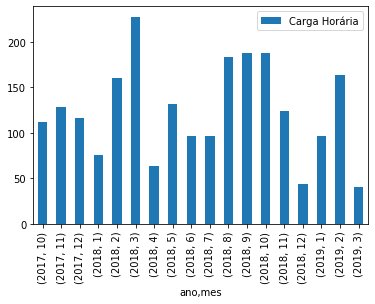

In [29]:
df_horas_por_ano.plot(kind="bar")

### Cumprimento da meta de treinamentos

Vamos criar um famigerado gráfico de pizza para visualizar a proporção de cumprimento de metas de treinamento pelos funcionários:

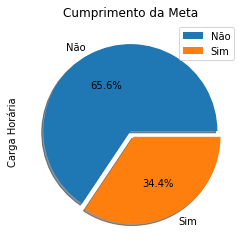

In [30]:
df_total_horas_funcionario.groupby("Cumpriu meta").count().plot.pie(
    y="Carga Horária", 
    title="Cumprimento da Meta",
    labels=["Não", "Sim"],
    explode=(0, 0.075),
    shadow=True,
    autopct="%1.1f%%"
)

## Gravando os dados

Por fim, podemos gerar arquivos com os resultados da nossa análise:

### Arquivo CSV

In [31]:
df_total_horas_funcionario.to_csv("out/horas-treinamento.csv", sep=";", index=False)

### Arquivo Excel

In [32]:
df_total_horas_funcionario.to_excel("out/horas-treinamento.xlsx")